# 1. Covariance and Correlation

### Covariance and Correlation

Covariance and correlation are two important measures used to assess the relationship between two variables.

### **Covariance**

Covariance measures how two variables change together. A positive covariance indicates that both variables tend to increase or decrease together, while a negative covariance suggests that when one variable increases, the other tends to decrease.

The **Formula for Covariance** is:

$$
\text{Cov}(X, Y) = \frac{1}{n} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})
$$

Where:
- $ ( X ) $ and  $ ( Y ) $ are the two variables.
- $ ( \bar{X} ) $ and $ ( \bar{Y} ) $ are the means of  $( X ) $ and $ ( Y ) $.
- $ ( n ) $ is the number of data points.

### **Pearson Correlation**

Pearson's correlation coefficient measures the linear relationship between two continuous variables. It ranges from -1 to 1, where:
- \( 1 \) indicates a perfect positive linear relationship.
- \( -1 \) indicates a perfect negative linear relationship.
- \( 0 \) indicates no linear relationship.

The **Formula for Pearson Correlation** is:

$$
r = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}
$$

Where:
- $ ( \text{Cov}(X, Y) ) $ is the covariance between $( X ) $ and $ ( Y ) $.
- $ ( \sigma_X ) $ and $ ( \sigma_Y ) $ are the standard deviations of $( X ) $ and $ ( Y ) $.

### **Spearman Correlation**

Spearman's rank correlation coefficient measures the strength and direction of the relationship between two ranked variables. It is useful for non-linear relationships.

The **Formula for Spearman's Rank Correlation** is:

$$
\rho = 1 - \frac{6 \sum_{i=1}^{n} d_i^2}{n(n^2 - 1)}
$$

Where:
- $ ( d_i ) $ is the difference between ranks for each observation.
- $ ( n ) $ is the number of data points.

### Real-World Example:
Let's examine the correlation between the **number of hours studied** and the **exam scores** of a group of students.


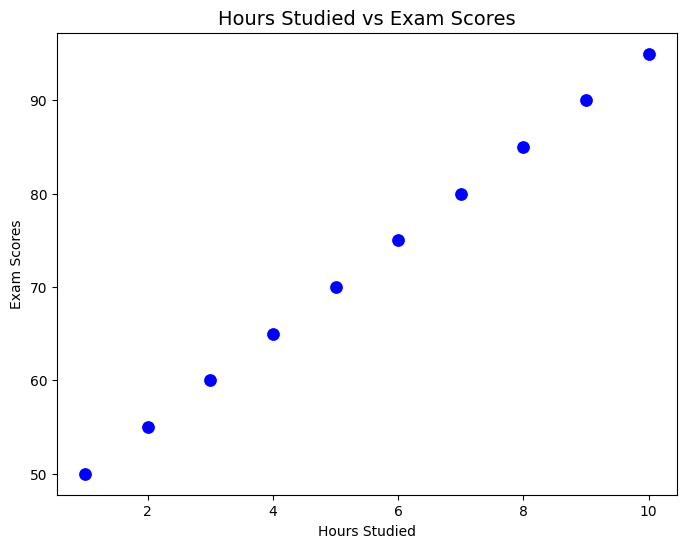

Covariance: 45.83
Pearson Correlation: 1.00
Spearman Correlation: 1.00


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data: Hours studied vs Exam scores
hours_studied = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
exam_scores = np.array([50, 55, 60, 65, 70, 75, 80, 85, 90, 95])

# Covariance
cov_xy = np.cov(hours_studied, exam_scores)[0, 1]

# Pearson Correlation
pearson_corr = np.corrcoef(hours_studied, exam_scores)[0, 1]

# Spearman Correlation
from scipy.stats import spearmanr
spearman_corr, _ = spearmanr(hours_studied, exam_scores)

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=hours_studied, y=exam_scores, color='blue', s=100)
plt.title("Hours Studied vs Exam Scores", fontsize=14)
plt.xlabel("Hours Studied")
plt.ylabel("Exam Scores")
plt.show()

# Display results
print(f"Covariance: {cov_xy:.2f}")
print(f"Pearson Correlation: {pearson_corr:.2f}")
print(f"Spearman Correlation: {spearman_corr:.2f}")


# 2. Simple Linear Regression
### Simple Linear Regression

Simple linear regression models the relationship between a dependent variable \( Y \) and an independent variable \( X \) by fitting a straight line.

The equation for the line is:

$$
Y = \beta_0 + \beta_1 X + \epsilon
$$

Where:
- \( Y \) is the dependent variable (response).
- \( X \) is the independent variable (predictor).
- $ ( \beta_0 ) $ is the intercept.
- $ ( \beta_1 ) $ is the slope (coefficient).
- $ ( \epsilon ) $ is the error term.

The goal is to estimate the parameters $( \beta_0 )$  (intercept) and $ ( \beta_1 ) $ (slope) that minimize the sum of squared errors (SSE).

### Key Metrics in Simple Linear Regression:
1. **Slope $ ( \beta_1 ) $**: Represents the change in \( Y \) for a unit change in \( X \).
2. **Intercept $ ( \beta_0 )$**: Represents the value of \( Y \) when \( X = 0 \).
3. **$ ( R^2 ) $ (Coefficient of Determination)**: Measures the proportion of variance in \( Y \) explained by \( X \). It ranges from 0 to 1, where 1 indicates a perfect fit.

### Example:
Using the same data, fit a simple linear regression model and calculate the slope, intercept, and $( R^2 ) $.



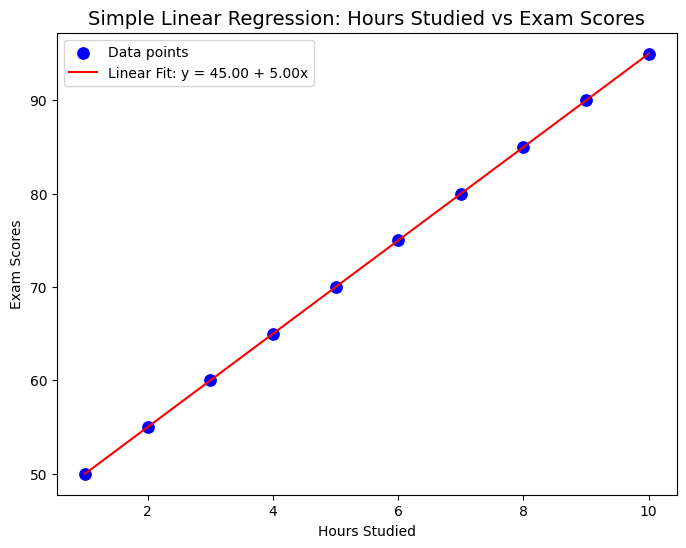

Slope (β₁): 5.00
Intercept (β₀): 45.00
R²: 1.00


In [2]:
from sklearn.linear_model import LinearRegression

# Reshape data for model
X = hours_studied.reshape(-1, 1)
y = exam_scores

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Get coefficients
intercept = model.intercept_
slope = model.coef_[0]

# Predictions
y_pred = model.predict(X)

# R²
r_squared = model.score(X, y)

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=hours_studied, y=exam_scores, color='blue', s=100, label='Data points')
plt.plot(hours_studied, y_pred, color='red', label=f'Linear Fit: y = {intercept:.2f} + {slope:.2f}x')
plt.title("Simple Linear Regression: Hours Studied vs Exam Scores", fontsize=14)
plt.xlabel("Hours Studied")
plt.ylabel("Exam Scores")
plt.legend()
plt.show()

# Display results
print(f"Slope (β₁): {slope:.2f}")
print(f"Intercept (β₀): {intercept:.2f}")
print(f"R²: {r_squared:.2f}")


# 3. Residual Analysis

### Residual Analysis

Residuals are the differences between the observed values and the predicted values from the regression model.

**Formula for Residuals**:

$$
\text{Residual} = Y_{\text{observed}} - Y_{\text{predicted}}
$$

### Importance of Residual Analysis:
1. **Model Fit**: By examining residuals, we can assess how well the model fits the data.
2. **Identifying Non-linearity**: If residuals exhibit patterns, the model may not have captured all the underlying relationships.
3. **Homoscedasticity**: Residuals should have constant variance across all levels of the independent variable.

### Example:
Perform residual analysis on the linear regression model from the previous section.


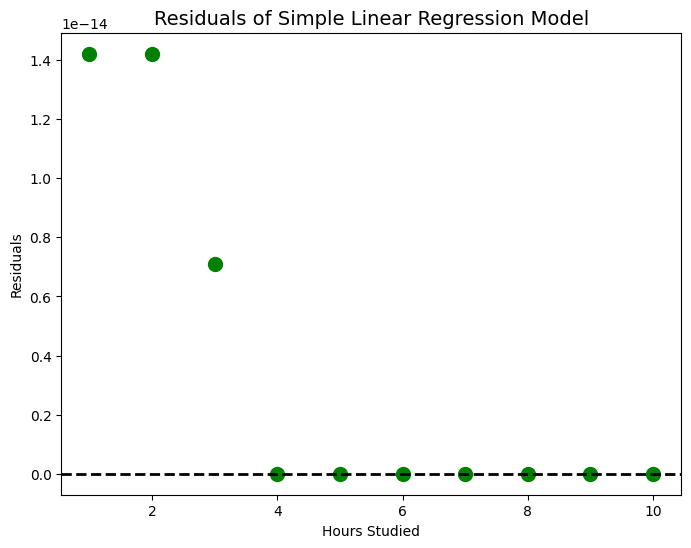

Mean of residuals: 0.00
Standard deviation of residuals: 0.00


In [3]:
# Calculate residuals
residuals = y - y_pred

# Visualization of Residuals
plt.figure(figsize=(8, 6))
plt.scatter(hours_studied, residuals, color='green', s=100)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.title("Residuals of Simple Linear Regression Model", fontsize=14)
plt.xlabel("Hours Studied")
plt.ylabel("Residuals")
plt.show()

# Display residual statistics
print(f"Mean of residuals: {np.mean(residuals):.2f}")
print(f"Standard deviation of residuals: {np.std(residuals):.2f}")


# Real-World Example: Predicting House Prices


### Predicting House Prices Using Simple Linear Regression

Let's extend our knowledge of correlation and regression to predict **house prices** based on **square footage**.

### Data Example:
- **Square Footage**: The size of the house.
- **House Price**: The price of the house.

We'll fit a simple linear regression model to this data and predict the price of a house based on its size.

### Example:
Simulate house price data and perform regression analysis.


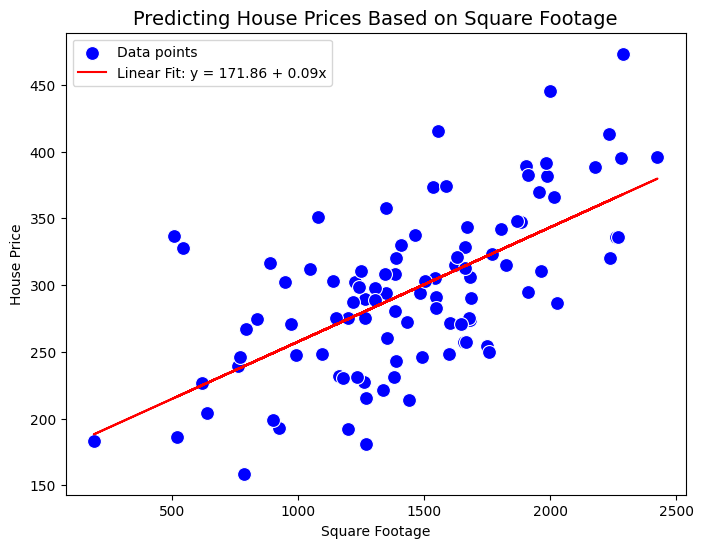

Slope (β₁): 0.09
Intercept (β₀): 171.86
R²: 0.40


In [4]:
# Simulate house price data
np.random.seed(42)
square_footage = np.random.normal(1500, 500, 100)  # Average 1500 sq ft with some noise
house_price = 150 + 0.1 * square_footage + np.random.normal(0, 50, 100)  # Base price + effect of size

# Reshape data for model
X_house = square_footage.reshape(-1, 1)
y_house = house_price

# Fit the model
model_house = LinearRegression()
model_house.fit(X_house, y_house)

# Predictions
y_house_pred = model_house.predict(X_house)

# R²
r_squared_house = model_house.score(X_house, y_house)

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=square_footage, y=house_price, color='blue', s=100, label='Data points')
plt.plot(square_footage, y_house_pred, color='red', label=f'Linear Fit: y = {model_house.intercept_:.2f} + {model_house.coef_[0]:.2f}x')
plt.title("Predicting House Prices Based on Square Footage", fontsize=14)
plt.xlabel("Square Footage")
plt.ylabel("House Price")
plt.legend()
plt.show()

# Display results
print(f"Slope (β₁): {model_house.coef_[0]:.2f}")
print(f"Intercept (β₀): {model_house.intercept_:.2f}")
print(f"R²: {r_squared_house:.2f}")


# 4. Multivariate Linear Regression

### Multivariate Linear Regression

In simple linear regression, we model the relationship between a single independent variable and a dependent variable. However, in real-world scenarios, multiple variables often influence the outcome.

**Multivariate Linear Regression** extends simple linear regression by considering multiple predictors. The equation for multivariate regression is:

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_k X_k + \epsilon
$$

Where:
- $ ( Y ) $ is the dependent variable.
- $( X_1, X_2, \dots, X_k )$ are the independent variables.
- $( \beta_0 )$ is the intercept.
- $( \beta_1, \beta_2, \dots, \beta_k )$ are the coefficients (slopes) for each independent variable.
- $ ( \epsilon )$ is the error term.

### Example: Predicting House Prices with Multiple Features

In this example, we'll predict house prices based on multiple features such as **square footage**, **number of bedrooms**, and **age of the house**.

### Key Metrics:
1. **Coefficients**: The estimated effect of each predictor on the outcome.
2. **R²**: The proportion of variance in the dependent variable explained by the predictors.
3. **Adjusted R²**: Adjusted for the number of predictors, providing a more accurate fit measure.

Let's proceed with this example.



In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Simulating data for house prices
np.random.seed(42)
square_footage = np.random.normal(1500, 500, 100)
bedrooms = np.random.randint(2, 6, 100)
age_of_house = np.random.randint(1, 100, 100)
house_price = 150 + 0.1 * square_footage + 30 * bedrooms - 0.5 * age_of_house + np.random.normal(0, 50, 100)

# Creating DataFrame
df = pd.DataFrame({
    'Square Footage': square_footage,
    'Bedrooms': bedrooms,
    'Age of House': age_of_house,
    'Price': house_price
})

# Splitting into train and test sets
X = df[['Square Footage', 'Bedrooms', 'Age of House']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the multivariate regression model
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

# Predictions
y_pred_multi = model_multi.predict(X_test)

# Evaluation
mse_multi = mean_squared_error(y_test, y_pred_multi)
r_squared_multi = model_multi.score(X_test, y_test)

# Display Results
print(f"Coefficients: {model_multi.coef_}")
print(f"Intercept: {model_multi.intercept_}")
print(f"Mean Squared Error: {mse_multi:.2f}")
print(f"R²: {r_squared_multi:.2f}")


Coefficients: [ 0.10563719 31.47951436 -0.5668578 ]
Intercept: 155.19496731416507
Mean Squared Error: 4031.46
R²: 0.20


# 5. Interaction Effects in Regression

### Interaction Effects in Regression

In some cases, the effect of one predictor on the dependent variable may depend on the value of another predictor. These are called **interaction effects**.

The formula for a regression model with an interaction effect is:

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 (X_1 \times X_2) + \epsilon
$$

Where:
- $( X_1 ) $ and $ ( X_2 )$ are independent variables.
- $( \beta_3 )$ is the coefficient for the interaction term $ ( X_1 \times X_2 )$.

### Example: Predicting House Prices with Interaction between Square Footage and Bedrooms

We will now include an interaction effect between **square footage** and **number of bedrooms**. This means that the effect of square footage on house price may change depending on how many bedrooms the house has.



In [6]:
# Adding interaction term: Square Footage * Bedrooms
df['Interaction'] = df['Square Footage'] * df['Bedrooms']

# Splitting into train and test sets again
X_interaction = df[['Square Footage', 'Bedrooms', 'Age of House', 'Interaction']]
y_interaction = df['Price']
X_train_int, X_test_int, y_train_int, y_test_int = train_test_split(X_interaction, y_interaction, test_size=0.2, random_state=42)

# Fitting the regression model with interaction term
model_int = LinearRegression()
model_int.fit(X_train_int, y_train_int)

# Predictions
y_pred_int = model_int.predict(X_test_int)

# Evaluation
mse_int = mean_squared_error(y_test_int, y_pred_int)
r_squared_int = model_int.score(X_test_int, y_test_int)

# Display Results
print(f"Coefficients: {model_int.coef_}")
print(f"Intercept: {model_int.intercept_}")
print(f"Mean Squared Error: {mse_int:.2f}")
print(f"R²: {r_squared_int:.2f}")


Coefficients: [ 1.65764471e-01  5.58068565e+01 -6.05233750e-01 -1.68003454e-02]
Intercept: 69.78770742386172
Mean Squared Error: 3888.15
R²: 0.23


# 6. Polynomial Regression

### Polynomial Regression

When the relationship between the independent variable and the dependent variable is non-linear, polynomial regression can be used. It fits a polynomial equation to the data.

The formula for polynomial regression is:

$$
Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \dots + \beta_k X^k + \epsilon
$$

Where:
- $ ( X^k ) $ represents higher-order terms of the independent variable.

### Example: Polynomial Regression to Model Non-linear Relationship

We will model a non-linear relationship between **square footage** and **house price** by fitting a polynomial regression model.



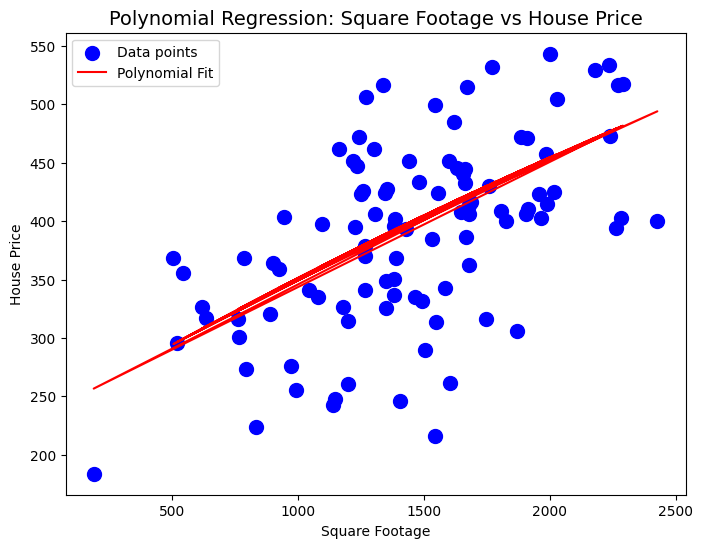

Coefficients: [ 0.00000000e+00  1.25918481e-01 -7.54396723e-06]
Intercept: 232.96998423994654
Mean Squared Error: 6716.57
R²: -0.33


In [7]:
from sklearn.preprocessing import PolynomialFeatures

# Creating Polynomial Features (degree = 2 for quadratic regression)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df[['Square Footage']])

# Splitting into train and test sets
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Fitting polynomial regression model
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_poly)

# Predictions
y_pred_poly = model_poly.predict(X_test_poly)

# Evaluation
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r_squared_poly = model_poly.score(X_test_poly, y_test_poly)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(df['Square Footage'], house_price, color='blue', s=100, label='Data points')
plt.plot(df['Square Footage'], model_poly.predict(poly.fit_transform(df[['Square Footage']])), color='red', label='Polynomial Fit')
plt.title("Polynomial Regression: Square Footage vs House Price", fontsize=14)
plt.xlabel("Square Footage")
plt.ylabel("House Price")
plt.legend()
plt.show()

# Display Results
print(f"Coefficients: {model_poly.coef_}")
print(f"Intercept: {model_poly.intercept_}")
print(f"Mean Squared Error: {mse_poly:.2f}")
print(f"R²: {r_squared_poly:.2f}")


# 7. Model Diagnostics
### Model Diagnostics

Once a regression model is built, it’s important to evaluate the assumptions and the quality of the fit. Here are some common diagnostic tools:

1. **Residual Plot**: Helps assess homoscedasticity (constant variance of residuals).
2. **Q-Q Plot**: Helps check the normality of residuals.
3. **VIF (Variance Inflation Factor)**: Measures multicollinearity between predictors.
4. **Leverage and Cook's Distance**: Helps detect influential data points.

### Example: Perform Model Diagnostics for Polynomial Regression

Let's visualize the residuals and perform some diagnostics on the polynomial regression model.


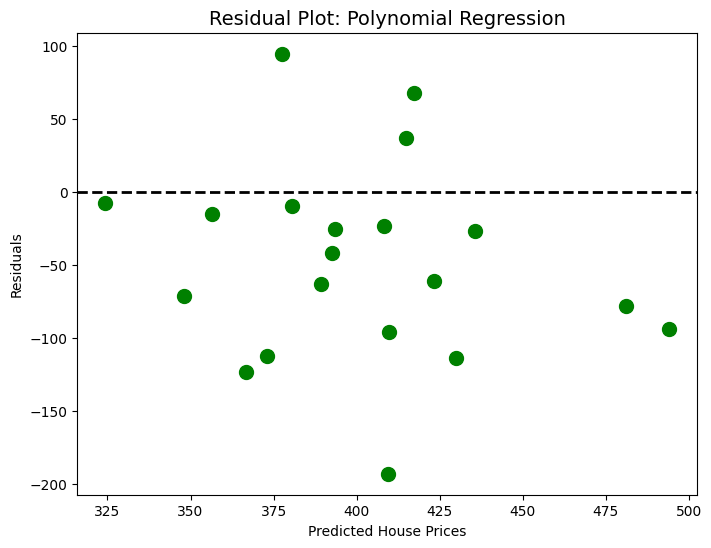

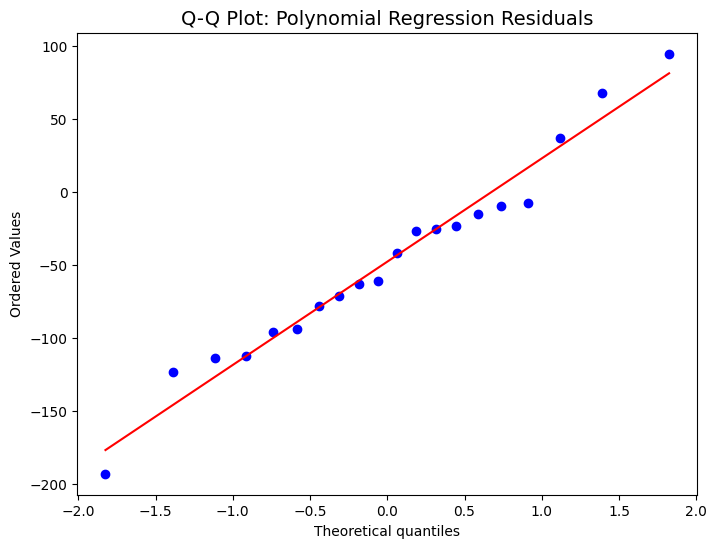

Mean of residuals: -48.03
Standard deviation of residuals: 66.40


In [8]:
# Residuals
residuals_poly = y_test_poly - y_pred_poly

# Residual Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_poly, residuals_poly, color='green', s=100)
plt.axhline(0, color='black', linestyle='--', linewidth=2)
plt.title("Residual Plot: Polynomial Regression", fontsize=14)
plt.xlabel("Predicted House Prices")
plt.ylabel("Residuals")
plt.show()

# Q-Q Plot
import scipy.stats as stats

plt.figure(figsize=(8, 6))
stats.probplot(residuals_poly, dist="norm", plot=plt)
plt.title("Q-Q Plot: Polynomial Regression Residuals", fontsize=14)
plt.show()

# Display residual statistics
print(f"Mean of residuals: {np.mean(residuals_poly):.2f}")
print(f"Standard deviation of residuals: {np.std(residuals_poly):.2f}")


### Summary of Correlation and Regression Models


1. **Covariance and Correlation**:
   - Covariance measures the direction of the relationship between variables, while correlation standardizes this into a unit-free metric.
   - Pearson's correlation measures linear relationships, while Spearman’s correlation measures rank-order relationships.

2. **Simple Linear Regression**:
   - A method for modeling the relationship between two continuous variables.
   - Focus on estimating the slope, intercept, and R², which indicate the strength of the relationship.

3. **Residual Analysis**:
   - Helps assess how well the model fits the data and check for assumptions like linearity and homoscedasticity.

4. **Real-World Applications**:
   - Correlation and regression are crucial for understanding relationships between variables and making predictions in various domains, from education (exam scores) to real estate (house prices).
5. **Multivariate Linear Regression**:
   - Considers multiple predictors to estimate the dependent variable. This model allows for a more nuanced understanding of how various factors influence the outcome.
   
6. **Interaction Effects**:
   - Incorporates interaction terms between predictors to model cases where the effect of one predictor depends on the value of another predictor.

7. **Polynomial Regression**:
   - Used when the relationship between the variables is non-linear, allowing for more flexibility in capturing complex trends.

8. **Model Diagnostics**:
   - It is essential to evaluate the assumptions behind the model. Residuals should ideally be randomly distributed with constant variance and be approximately normally distributed.

### Real-World Applications:

- **Housing Market**: Predicting house prices based on various factors such as square footage, number of bedrooms, and age of the house.
- **Business**: Understanding how different factors (such as advertising spending, product price, etc.) influence sales.



